# 1. Selection Sort

The algorithm maintains two subarrays in a given array.

1) The subarray which is already sorted.\
2) Remaining subarray which is unsorted.

Sorts an array by repeatedly finding the minimum element (considering ascending order) from unsorted part and putting it at the beginning

In [10]:
def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i + 1, len(arr)):
            if arr[min_idx] > arr[j]:
                min_idx = j
        
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

    return arr

In [11]:
A = [64, 25, 12, 22, 11]
selection_sort(A)

[11, 12, 22, 25, 64]

Time Complexity: O($n^2$) as there are two nested loops.

Auxiliary Space: O(1)

# 2. Bubble Sort

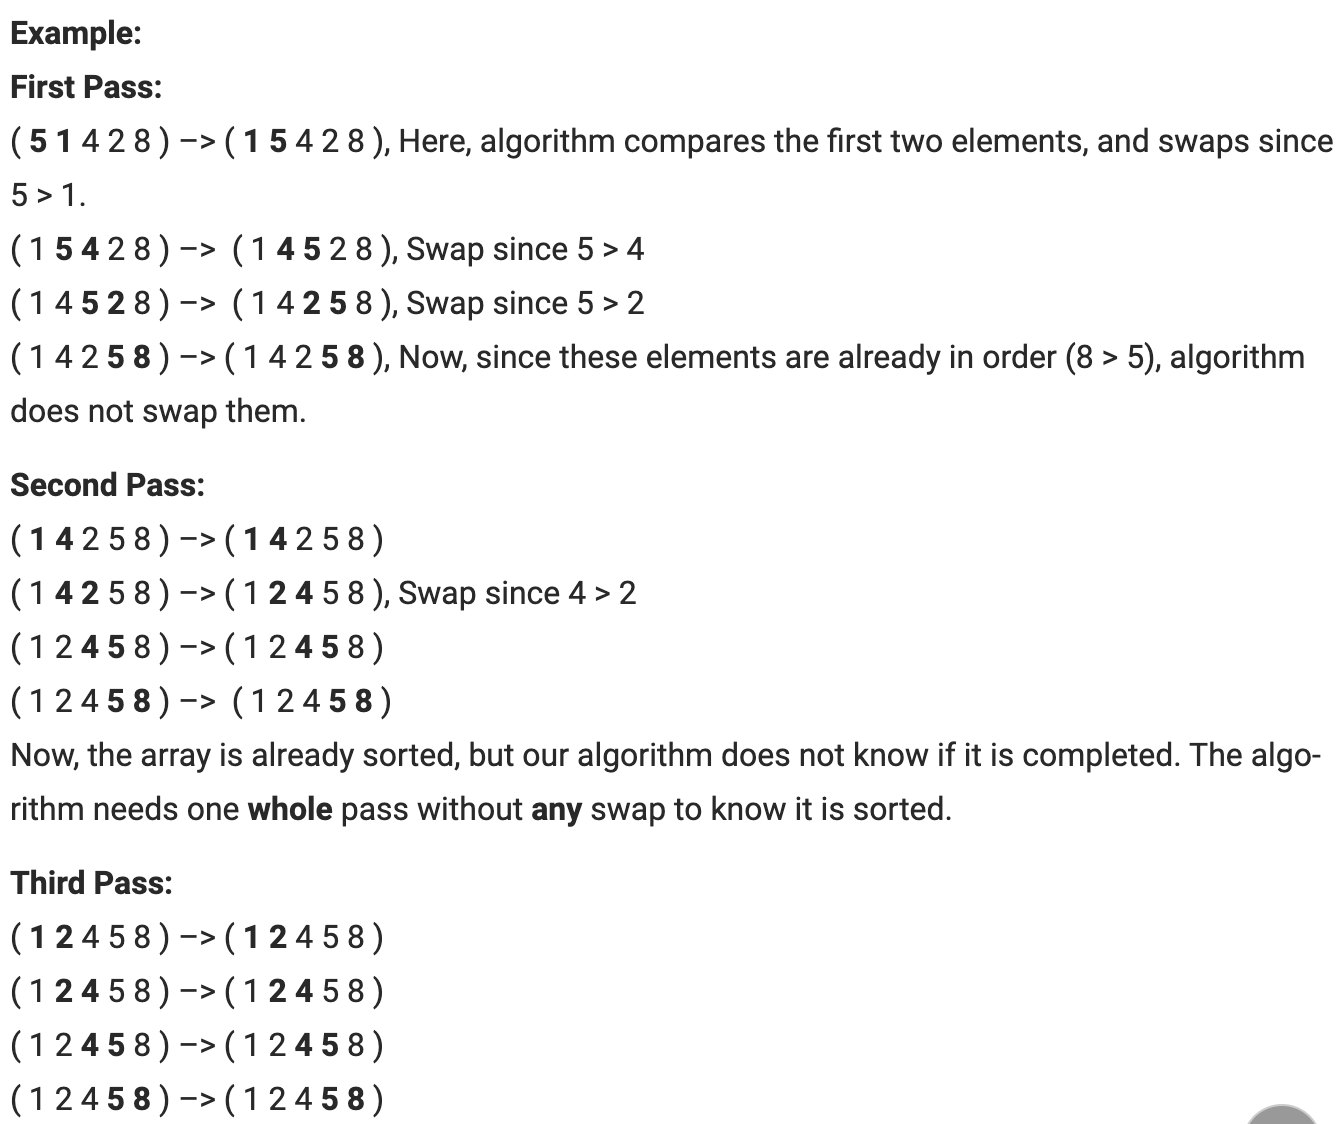

Repeatedly swap the adjacent elements if they are in wrong order

In [13]:
def bubble_sort(arr):
    sort = True
    
    while sort is True:
        sort = False
        
        for idx in range(len(arr) - 1):
            if arr[idx] > arr[idx + 1]:
                arr[idx], arr[idx+1] = arr[idx+1], arr[idx]
                sort = True
    
    return arr

In [14]:
arr = [64, 34, 25, 12, 22, 11, 90] 
bubble_sort(arr)

[11, 12, 22, 25, 34, 64, 90]

Worst and Average Case Time Complexity: $O(n^2)$. Worst case occurs when array is reverse sorted.

Best Case Time Complexity: O(n). Best case occurs when array is already sorted.

Auxiliary Space: O(1)

# 3. Insertion Sort

To sort an array of size n in ascending order:\
1: Iterate from arr[1] to arr[n] over the array.\
2: Compare the current element (key) to its predecessor.\
3: If the key element is smaller than its predecessor, compare it to the elements before. Move the greater elements one position up to make space for the swapped element

In [19]:
def insertion_sort(arr):
    
    for i in range(len(arr)):
        for j in reversed(range(1, i + 1)):
            if arr[j - 1] > arr[j]:
                arr[j], arr[j - 1] = arr[j - 1], arr[j]
                
    return arr

In [20]:
arr = [12, 11, 13, 5, 6] 
insertion_sort(arr)

[5, 6, 11, 12, 13]

Time Complexity: $O(2n)$

Auxiliary Space: O(1)

We can use binary search to reduce the number of comparisons in normal insertion sort. Binary Insertion Sort uses binary search to find the proper location to insert the selected item at each iteration. In normal insertion, sorting takes O(i) (at ith iteration) in worst case. We can reduce it to O(logi) by using binary search. The algorithm, as a whole, still has a running worst case running time of O(n2) because of the series of swaps required for each insertion. Refer this for implementation.

# 4. Merge Sort (Divide And Conquer)

## I. Algorithm

MergeSort(arr[], l,  r)\
If r > l
     1. Find the middle point to divide the array into two:  
             middle m = (l+r)/2
     2. Call mergeSort for first half:   
             Call mergeSort(arr, l, m)
     3. Call mergeSort for second half:
             Call mergeSort(arr, m+1, r)
     4. Merge the two halves sorted in step 2 and 3:
             Call merge(arr, l, m, r)

The array is recursively divided in two halves till the size becomes 1. Once the size becomes 1, the merge processes comes into action and starts merging arrays back till the complete array is merged.

In [44]:
def merge_sort(arr):
    if len(arr) > 1:
        midpoint = len(arr) // 2
        arr1 = arr[:midpoint]
        arr2 = arr[midpoint:]
        
        merge_sort(arr1)
        merge_sort(arr2)

        i = j = k = 0
        
        while i < len(arr1) and j < len(arr2):
            if arr1[i] < arr2[j]:
                arr[k] = arr1[i]
                k += 1
                i += 1
            else:
                arr[k] = arr2[j]
                j += 1
                k += 1
        
        while i < len(arr1):
            arr[k] = arr1[i]
            k += 1
            i += 1
        
        while j < len(arr2):
            arr[k] = arr2[j]
            j += 1
            k += 1
        
    return arr

In [45]:
arr = [5, 11, 7, 6, 12, 13]
merge_sort(arr)

[5, 6, 7, 11, 12, 13]

Time complexity: O(nLogn) as merge sort always divides the array into two halves and take linear time to merge two halves.

Auxiliary Space: O(n)

# 5. Quick Sort

## I. Algorithm

It picks an element as pivot and partitions the given array around the picked pivot.

There are many different versions of quickSort that pick pivot in different ways.

1. Always pick first element as pivot.
2. Always pick last element as pivot (implemented below)
3. Pick a random element as pivot.
4. Pick median as pivot.

Target of partitions is, given an array and an element x of array as pivot, put x at its correct position in sorted array and put all smaller elements (smaller than x) before x, and put all greater elements (greater than x) after x. All this should be done in linear time.

## II. Partition Algorithm

In [39]:
# low  --> Starting index
# high  --> Ending index
def quick_sort(arr, low, high):
    if low < high:
        # pi is partitioning index, arr[pi] is now at right place
        pi = partition(arr, low, high)
        quickSort(arr, low, pi - 1)
        quickSort(arr, pi + 1, high)
    
    return arr

In [40]:
def partition(arr, low, high):
    
    #This function takes the last element as pivot
    pivot = arr[high]
    
    # Index of the smaller element
    i = low - 1
    
    for j in range(low, high):
        
        # Shifts value less than pivot to left
        if arr[j] < pivot:
            arr[i + 1], arr[j] = arr[j], arr[i + 1]
            i += 1
    
    # Place the pivot where it belongs
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    
    return i + 1

In [41]:
arr = [10, 7, 8, 9, 1, 5] 
n = len(arr) 
quick_sort(arr,0,n-1) 

[1, 5, 7, 8, 9, 10]

Time complexity of QuickSort is $O(n^2)$

**Why Quick Sort is preferred over MergeSort for sorting Arrays**

Quick Sort in its general form is an in-place sort (i.e. it doesn’t require any extra storage) whereas merge sort requires O(N) extra storage, N denoting the array size which may be quite expensive. Allocating and de-allocating the extra space used for merge sort increases the running time of the algorithm. Comparing average complexity we find that both type of sorts have O(NlogN) average complexity but the constants differ. For arrays, merge sort loses due to the use of extra O(N) storage space.

**Worst Case:** The worst case occurs when the partition process always picks greatest or smallest element as pivot. If we consider above partition strategy where last element is always picked as pivot, the worst case would occur when the array is already sorted in increasing or decreasing order. 

Most practical implementations of Quick Sort use randomized version. The randomized version has expected time complexity of O(nLogn). The worst case is possible in randomized version also, but worst case doesn’t occur for a particular pattern (like sorted array) and randomized Quick Sort works well in practice.

# 6. Heap Sort

A complete binary tree is a binary tree in which every level, except possibly the last, is completely filled, and all nodes are as far left as possible (Source Wikipedia)

A Binary Heap is a Complete Binary Tree where items are stored in a special order such that value in a parent node is greater(or smaller) than the values in its two children nodes. The former is called as max heap and the latter is called min heap

If the parent node is stored at index I, the left child can be calculated by 2 * I + 1 and right child by 2 * I + 2 (assuming the indexing starts at 0).

Heap Sort Algorithm for sorting in increasing order:
1. Build a max heap from the input data (heapify)
2. Replace the root with the last item of the heap.
3. Finally, heapify the root of tree.
4. Repeat above steps 2 and 3 while size of heap is greater than 1.

In [49]:
import heapq
h = [1, 3, 5, 7, 9, 2, 4, 6, 8, 0]
heapq.heapify(h)
print(heapq.nlargest(3, h))
[ heapq.heappop(h) for x in range(len(h)) ]

[9, 8, 7]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [64]:
def heapify(arr, length, idx):
    root = idx
    left = 2 * idx + 1
    right = 2 * idx + 2
    
    # See if left child of root exists and is 
    # greater than root
    if left < length and arr[idx] < arr[left]:
        root = left
    
    # See if right child of root exists and is 
    # greater than root
    if right < length and arr[root] < arr[right]:
        root = right
    
    # Basically, search for children of greater value and switch
    if root != idx:
        arr[idx], arr[root] = arr[root], arr[idx]
        heapify(arr, length, root)

In [62]:
def heap_sort(arr):
    l = len(arr)
    
    # from l to 0 in reverse order
    # maxheap
    for i in range(l, -1, -1):
        heapify(arr, l, i)
    
    # Swap with the root element at the center
    # l - 1: nodes are indexed 0
    # 0 to exclude the root
    # -1 to increment in reverse
    for i in range(l - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
        
    return arr

In [63]:
h = [1, 3, 5, 7, 9, 2, 4, 6, 8, 0]
heap_sort(h)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Time Complexity: Time complexity of heapify is O(Logn). Time complexity of createAndBuildHeap() is O(n) and overall time complexity of Heap Sort is O(nLogn).